In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

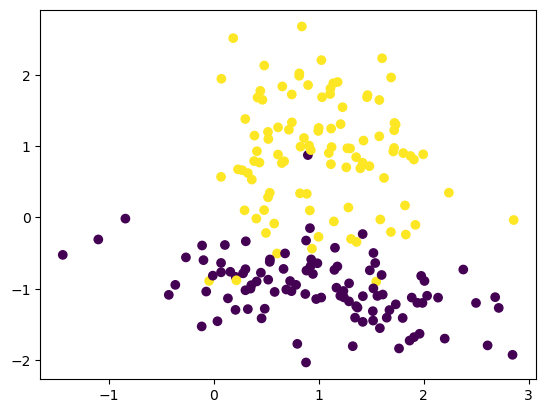

In [16]:
m = 200
X, y = datasets.make_classification(n_samples=m,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y, marker='o');

y = y.reshape(-1,1)

n_inputs = X.shape[1]
n_outputs = 1
learning_rate = 0.01
n_epochs = 500

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
print(x_train.shape, y_train.shape)

(140, 2) (140, 1)


In [19]:
tf.compat.v1.disable_eager_execution()
x_p = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,n_inputs], name='x_p')
y_p = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,1], name='y_p')
print(x_p.shape, y_p.shape)

weights = tf.Variable(tf.zeros(shape=(n_inputs,n_outputs)), name='weights')
bias = tf.Variable(tf.zeros((n_outputs)), name='bias')
print(weights.shape, bias.shape)

(None, 2) (None, 1)
(2, 1) (1,)


In [20]:
z = tf.matmul(x_p, weights) + bias
model = tf.sigmoid(z)
print(model.shape)

(None, 1)


In [21]:
loss_op = -tf.reduce_mean(y_p*tf.compat.v1.log(model) + (1-y_p)*tf.compat.v1.log(1-model), name='loss')
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_op)

In [22]:
check_prediction = tf.equal(tf.round(model), y_p)
accuracy_op = tf.reduce_mean(tf.cast(check_prediction, tf.float32)) * 100

In [23]:
init = tf.compat.v1.global_variables_initializer()

In [24]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    loss_values = []
    for epoch in range(n_epochs):
        loss_value, accuracy_value,_=sess.run([loss_op, accuracy_op, optimizer], feed_dict={x_p: x_train, y_p: y_train})
        loss_values.append(loss_value)
        print(f'loss value:{loss_value}, accuracy: {accuracy_value}')
    weight_value,bias_value = sess.run([weights,bias])

loss value:0.6931472420692444, accuracy: 50.0
loss value:0.6907196044921875, accuracy: 92.14285278320312
loss value:0.6883084774017334, accuracy: 92.14285278320312
loss value:0.6859138607978821, accuracy: 92.14285278320312
loss value:0.6835353970527649, accuracy: 92.14285278320312
loss value:0.6811730861663818, accuracy: 92.14285278320312
loss value:0.6788269281387329, accuracy: 92.14285278320312
loss value:0.676496684551239, accuracy: 92.14285278320312
loss value:0.6741822361946106, accuracy: 92.14285278320312
loss value:0.6718835234642029, accuracy: 92.14285278320312
loss value:0.6696004271507263, accuracy: 92.14285278320312
loss value:0.6673327684402466, accuracy: 92.14285278320312
loss value:0.6650804877281189, accuracy: 92.14285278320312
loss value:0.6628435850143433, accuracy: 92.14285278320312
loss value:0.6606217622756958, accuracy: 92.14285278320312
loss value:0.6584150791168213, accuracy: 92.14285278320312
loss value:0.6562232375144958, accuracy: 92.14285278320312
loss value:

loss value:0.39586472511291504, accuracy: 92.14285278320312
loss value:0.3952520489692688, accuracy: 92.14285278320312
loss value:0.394642174243927, accuracy: 92.14285278320312
loss value:0.3940351605415344, accuracy: 92.14285278320312
loss value:0.3934308886528015, accuracy: 92.14285278320312
loss value:0.39282944798469543, accuracy: 92.14285278320312
loss value:0.3922307789325714, accuracy: 92.14285278320312
loss value:0.39163482189178467, accuracy: 92.14285278320312
loss value:0.3910416066646576, accuracy: 92.14285278320312
loss value:0.3904511034488678, accuracy: 92.14285278320312
loss value:0.38986334204673767, accuracy: 92.14285278320312
loss value:0.38927820324897766, accuracy: 92.14285278320312
loss value:0.38869574666023254, accuracy: 92.14285278320312
loss value:0.38811591267585754, accuracy: 92.14285278320312
loss value:0.38753870129585266, accuracy: 92.14285278320312
loss value:0.3869641125202179, accuracy: 92.14285278320312
loss value:0.38639211654663086, accuracy: 92.1428

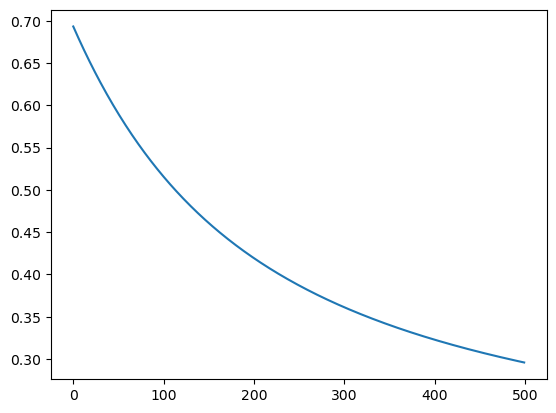

In [25]:
plt.plot(loss_values)
plt.show();

In [26]:
w1, w2 = weight_value

In [27]:
b = bias_value[0]

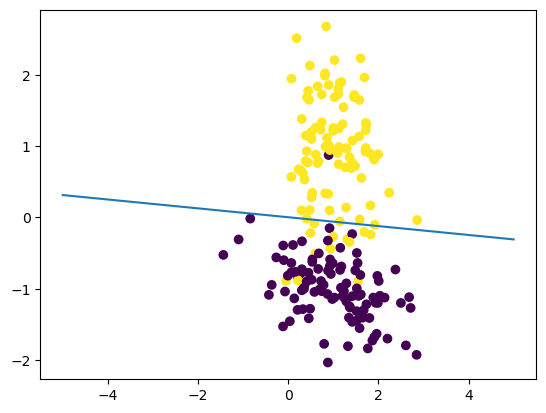

In [28]:
x1 = np.linspace(-5, 5, 200)
x2 = -(w1*x1+b)/w2
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y.reshape(-1,), marker='o');
plt.plot(x1, x2);